['/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/lens1.csv', '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/lens2.csv', '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/lens3.csv', '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/lens4.csv']
0 /Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/start.csv
1 /Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/lens1.csv
2 /Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/drift1lens1.csv
3 /Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/drift2lens1.csv
4 /Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/transport_nm/data_mirrors/drift3lens1.csv
5 /Users/eseguraca.6/De

/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


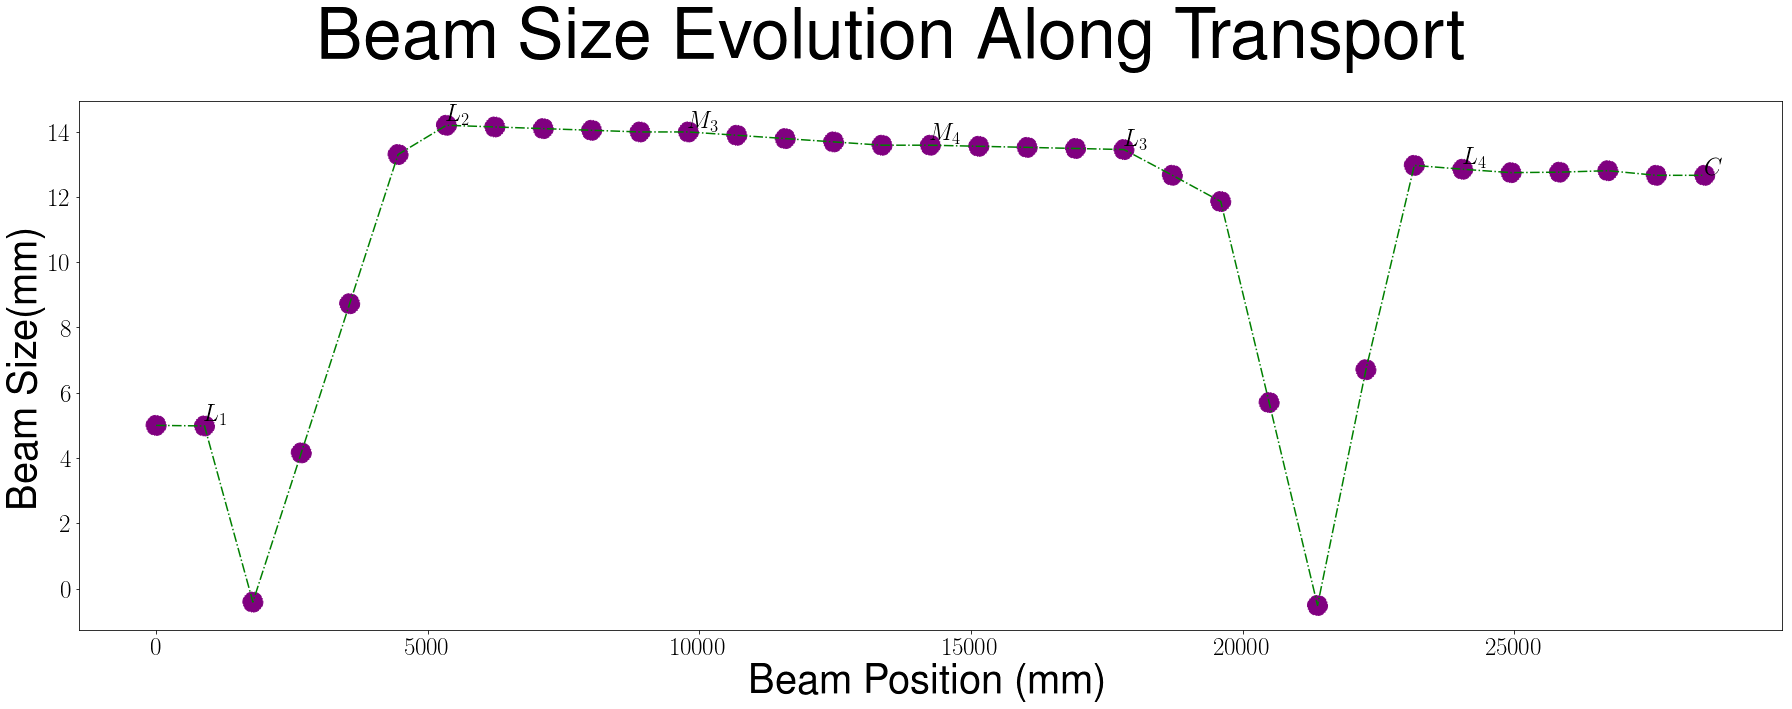

In [96]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

from datetime import datetime
import sys
import os
import time
cpath= Popen(['pwd'],stdout=PIPE, stderr=PIPE).communicate()[0].decode('utf-8').rstrip()

f = filename_generator(cpath)


data_paths = data_pathfiles_generator(cpath)

lens_paths = []
mirrors_paths = []
drifts_m1m2_paths = []
drifts_l2m3_paths = []
drifts_gallery_paths = []
drifts_m4l3_paths = []
drifts_iptable_paths=[]
drifts_l4comp_paths = []
start_end_paths =[]
for i in data_paths:
    if 'lens' in i and not 'drift' in i:
        lens_paths.append(i)
    elif '/mirror' in i:
        mirrors_paths.append(i)
    elif '/drift' in i:
        if 'lens1' in i:
            drifts_m1m2_paths.append(i)
        elif 'lens2' in i:
            drifts_l2m3_paths.append(i)
        if 'gallery' in i:
            drifts_gallery_paths.append(i)
        if 'm4' in i:
            drifts_m4l3_paths.append(i)
        if 'iptable' in i:
            drifts_iptable_paths.append(i)
        if 'l4' in i:
            drifts_l4comp_paths.append(i)
    else:
        start_end_paths.append(i)
    
start_end_paths.reverse()

print(lens_paths)

transport_paths = [start_end_paths[0],lens_paths[0]]

for i in drifts_m1m2_paths:
    transport_paths.append(i)

transport_paths.append(lens_paths[1])

for i in drifts_l2m3_paths:
    transport_paths.append(i)

transport_paths.append(mirrors_paths[0])

for i in drifts_gallery_paths:
    transport_paths.append(i)

transport_paths.append(mirrors_paths[1])

for i in drifts_m4l3_paths:
    transport_paths.append(i)
    
transport_paths.append(lens_paths[2])
transport_paths.append(mirrors_paths[2])

for i in drifts_iptable_paths:
    transport_paths.append(i)
    
transport_paths.append(lens_paths[3])

for i in drifts_l4comp_paths:
    transport_paths.append(i)

transport_paths.append(start_end_paths[1])

for i in range(len(transport_paths)):
    print(i, transport_paths[i])

    
transport_data = data_generator(transport_paths)

transport_waist = np.multiply(2, fit_parameter_extractor(gaussian, transport_data)[2])

x = np.linspace(0, 28500, 33)
y = transport_waist

fig = plt.figure(figsize=(25,10))
axes = fig.add_subplot(1, 1, 1)
axes.scatter(x, y, color = 'purple', linestyle = '-.', s=400, marker = 'o')
axes.plot(x,y, c= 'green', linestyle = '-.')
axes.tick_params(axis='both',labelsize=40)
axes.legend(fontsize =65)
axes.set_xlabel(str('Beam Position (mm)'), fontsize=30+10)
axes.set_ylabel(str('Beam Size(mm)'), fontsize=30+10)
axes.tick_params(axis='both',labelsize=20+5)
axes.legend(loc = 'upper right', fontsize=20)
fig.suptitle('Beam Size Evolution Along Transport', fontsize=55+15)
fig.tight_layout()
fig.subplots_adjust(top=0.85)

labels =['$L_1$','$L_2$', 
          
            '$M_3$', 
         
         '$M_4$', 
         
         '$L_3$', 
         
         '$L_4$', 
         
         '$C$']

xp = [x[1], x[6] ,x[11],  x[16],x[20], x[27], x[32]]
yp = [y[1], y[6], y[11], y[16],y[20], y[27], y[32]]
for l, xpt, ypt in zip(labels, xp,yp):
    axes.text(xpt,ypt,l, fontsize=22+2)

In [88]:
transport_waistl = transport_waist.tolist()

transport_waistl

[4.9827249251666625,
 -0.41281427199918624,
 4.1580407948119475,
 8.728355042893021,
 13.298687349139785,
 14.194689662747553,
 14.143508710626758,
 14.09236973208584,
 14.041162629225239,
 13.990016740543625,
 13.990016767706491,
 13.888541853252264,
 13.787030719812538,
 13.685533453967919,
 13.584054471286029,
 13.584054446240721,
 13.550897787376313,
 13.5174029283095,
 13.48405942439851,
 13.45099872027644,
 12.663709041076247,
 11.858418889960138,
 5.7006116266629725,
 -0.5171492163404272,
 6.706492930284589,
 12.965875176004555,
 12.847569246888304,
 12.743504044944707,
 12.75802612189963,
 12.803292039496357,
 12.661185497888095,
 12.6618864816566]